# Speed Dating Data - EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Meta analysis

In [2]:
# Read data from file
def read_data(path):
    df = pd.read_csv(path, encoding = 'ISO-8859-1')
    df.drop_duplicates(inplace=True)
    return df

In [3]:
# Get column information for all columns: unique values, NAN indexes, description
def get_column_info(df):
    
    col_val = {}
    for col in df.columns:
        
        # indexes of the N/A values 
        inds = [i for i,n in enumerate(df[col]) if str(n).lower() == "nan"]
        
        # unique values of the current column
        uniq = df[col].value_counts(dropna=False).sort_index()
        
        col_val[col] = {'Unique values' : uniq, 'NAN indexes' : inds, 'Info' : df[col].describe()}
        
    return col_val

In [4]:
# Read the data
df = read_data("Speed Dating Data.csv")
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dimensions
df.shape

# 195 columns
# 8378 rows

(8378, 195)

In [6]:
# Information
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 0 to 8377
Data columns (total 195 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    iid       8378 non-null   int64  
 1    id        8377 non-null   float64
 2    gender    8378 non-null   int64  
 3    idg       8378 non-null   int64  
 4    condtn    8378 non-null   int64  
 5    wave      8378 non-null   int64  
 6    round     8378 non-null   int64  
 7    position  8378 non-null   int64  
 8    positin1  6532 non-null   float64
 9    order     8378 non-null   int64  
 10   partner   8378 non-null   int64  
 11   pid       8368 non-null   float64
 12   match     8378 non-null   int64  
 13   int_corr  8220 non-null   float64
 14   samerace  8378 non-null   int64  
 15   age_o     8274 non-null   float64
 16   race_o    8305 non-null   float64
 17   pf_o_att  8289 non-null   float64
 18   pf_o_sin  8289 non-null   float64
 19   pf_o_int  8289 non-null   float64
 20   pf_o_f

In [7]:
# Object type columns description
df.describe(include=['object'])

,field,undergra,mn_sat,tuition,from,zipcode,income,career
count,8315,4914,3133,3583,8299,7314,4279,8289
unique,259,241,68,115,269,409,261,367
top,Business,UC Berkeley,"1,400.00","26,908.00",New York,0,"55,080.00",Finance
freq,521,107,403,241,522,355,124,202


In [8]:
# Discrete type columns description
df.describe(include=['int64'])

,iid,gender,idg,condtn,wave,round,position,order,partner,match,samerace,dec_o,dec
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,283.675937,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,8.927668,8.963595,0.164717,0.395799,0.419551,0.419909
std,158.583367,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.477009,5.491068,0.370947,0.489051,0.493515,0.493573
min,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,281.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000
75%,407.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,13.000000,13.000000,0.000000,1.000000,1.000000,1.000000
max,552.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Continiuos type columns description
df.describe(include=['float64'])

,id,positin1,pid,int_corr,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8377.000000,6532.000000,8368.000000,8220.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,8.960248,9.295775,283.863767,0.196010,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,5.491329,5.650199,158.584899,0.303539,3.563648,1.230689,12.569802,7.044003,6.782895,6.085526,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,1.000000,-0.830000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,4.000000,4.000000,154.000000,-0.020000,24.000000,2.000000,15.000000,15.000000,17.390000,15.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,8.000000,9.000000,281.000000,0.210000,26.000000,2.000000,20.000000,18.370000,20.000000,18.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,13.000000,14.000000,408.000000,0.430000,28.000000,4.000000,25.000000,20.000000,23.810000,20.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,22.000000,22.000000,552.000000,0.910000,55.000000,6.000000,100.000000,60.000000,50.000000,50.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
# Get informations for each column
columns_info = get_column_info(df)
columns_info

{'iid': {'Unique values': 1      10
  2      10
  3      10
  4      10
  5      10
         ..
  548    22
  549    22
  550    22
  551    22
  552    22
  Name: iid, Length: 551, dtype: int64,
  'NAN indexes': [],
  'Info': count    8378.000000
  mean      283.675937
  std       158.583367
  min         1.000000
  25%       154.000000
  50%       281.000000
  75%       407.000000
  max       552.000000
  Name: iid, dtype: float64},
 'id': {'Unique values': 1.0     552
  2.0     552
  3.0     541
  4.0     547
  5.0     547
  6.0     552
  7.0     505
  8.0     505
  9.0     479
  10.0    480
  11.0    382
  12.0    382
  13.0    357
  14.0    372
  15.0    348
  16.0    319
  17.0    253
  18.0    237
  19.0    178
  20.0    160
  21.0     86
  22.0     43
  NaN       1
  Name: id, dtype: int64,
  'NAN indexes': [8377],
  'Info': count    8377.000000
  mean        8.960248
  std         5.491329
  min         1.000000
  25%         4.000000
  50%         8.000000
  75%        13.000

## Fields analysis

### About the people

<Axes: title={'center': 'Gender'}, xlabel='Gender', ylabel='Quntity'>

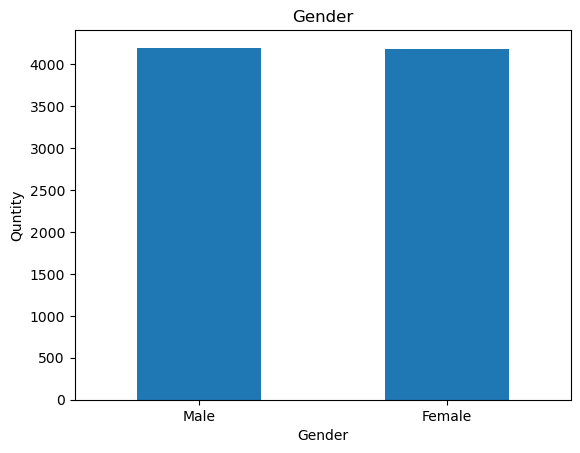

In [11]:
# The 'gender' field analysis
gender_map = {0 : 'Female', 1 : 'Male'}
df['gender_tmp'] = df['gender'].map(gender_map)
#df['gender'].value_counts()
df['gender_tmp'].value_counts().plot(kind = 'bar', rot = 0,  xlabel = 'Gender', ylabel = 'Quntity',  title = "Gender")

# Approximately equal number of men and women

In [12]:
# The 'race' field analysis
race_map = {1 : 'Black/African American',
            2 : 'European/Caucasian-American',
            3 : 'Latino/Hispanic American',
            4 : 'Asian/Pacific Islander/Asian-America',
            5 : 'Native American',
            6 : 'Other'}
    
df['race_tmp'] = df['race'].map(race_map)
df['race_tmp'].value_counts(normalize=True)

# Half of the participants are European/Caucasian-American.
# The second large group is Asian/Pacific Islander/Asian-America

European/Caucasian-American             0.568491
Asian/Pacific Islander/Asian-America    0.238364
Latino/Hispanic American                0.079856
Other                                   0.062778
Black/African American                  0.050511
Name: race_tmp, dtype: float64

<Axes: title={'center': 'Race'}, xlabel='Race', ylabel='Quntity'>

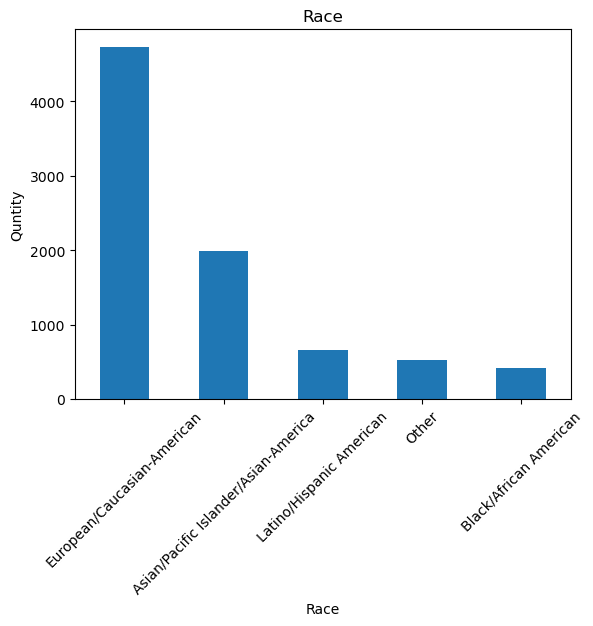

In [13]:
# The 'race' field plot
df['race_tmp'].value_counts().plot(kind = 'bar', rot = 45, xlabel = 'Race', ylabel = 'Quntity',  title = "Race")

In [14]:
# The 'age' field analysis
# Create dictionary of ages sorted by keys (ages)
d = dict(df['age'].value_counts())   
dKeys = list(d.keys())    
dKeys.sort()
sorted_dict = {i: d[i] for i in dKeys} 
sorted_dict

# Most of the participants are 21-34 years old

{18.0: 10,
 19.0: 20,
 20.0: 55,
 21.0: 291,
 22.0: 655,
 23.0: 894,
 24.0: 863,
 25.0: 837,
 26.0: 869,
 27.0: 1059,
 28.0: 746,
 29.0: 589,
 30.0: 574,
 31.0: 125,
 32.0: 210,
 33.0: 161,
 34.0: 152,
 35.0: 60,
 36.0: 45,
 37.0: 5,
 38.0: 19,
 39.0: 18,
 42.0: 20,
 55.0: 6}

<Axes: >

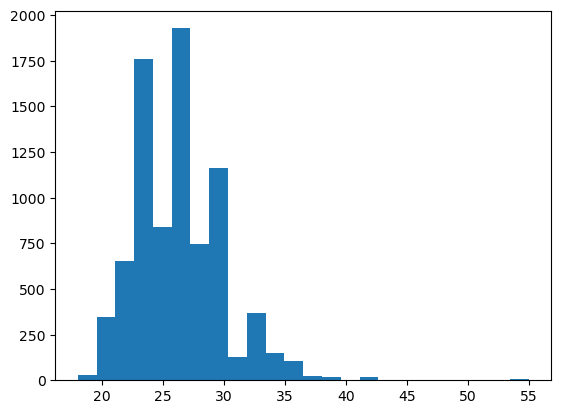

In [15]:
# The 'age' field histogram
# Number of bins is chosen according to the number of unique values
df.age.hist(bins=24, grid=False)

<Axes: >

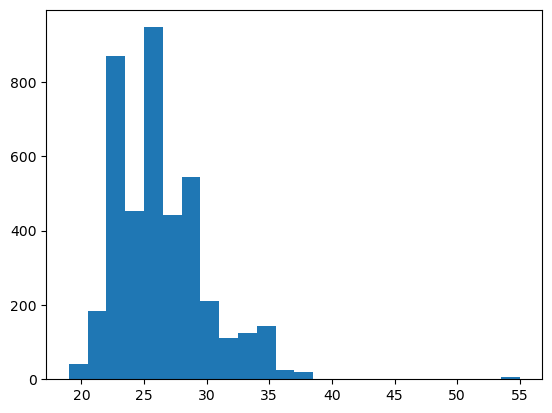

In [16]:
# The 'age' field histogram for females
df_age_female = df[df['gender_tmp']=='Female']
df_age_female.age.hist(bins=24, grid=False)

<Axes: >

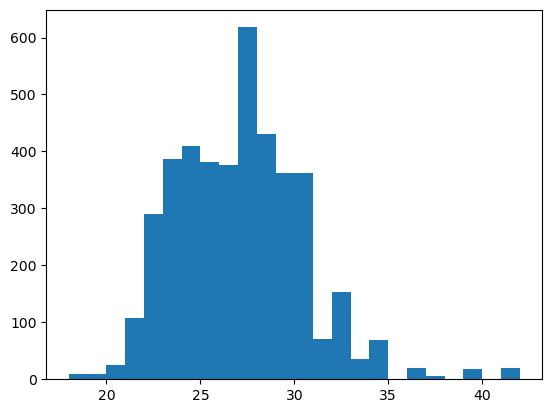

In [17]:
# The 'age' field histogram for males
df_age_male = df[df['gender_tmp']=='Male']
df_age_male.age.hist(bins=24, grid=False)

In [18]:
# The 'career_c' field analysis
career_c_map = {1: 'Lawyer', 
2: 'Academic/Research',
3: 'Psychologist', 
4: 'Doctor/Medicine', 
5: 'Engineer', 
6: 'Creative Arts/Entertainment', 
7: 'Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin', 
8: 'Real Estate', 
9: 'International/Humanitarian Affairs', 
10: 'Undecided', 
11:'Social Work',
12:'Speech Patholog',
13:'Politics',
14:'Pro sports/Athletics',
15:'Other',
16:'Journalism',
17:'Architecture'
}

df['career_c_tmp'] = df['career_c'].map(career_c_map)
df['career_c_tmp'].value_counts(normalize=True)

# Half of the participants works in the fields:
# Academic/Research                                                  
# Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin

Academic/Research                                                       0.281553
Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin    0.263350
Creative Arts/Entertainment                                             0.087864
Lawyer                                                                  0.081917
International/Humanitarian Affairs                                      0.066383
Doctor/Medicine                                                         0.051092
Undecided                                                               0.045995
Psychologist                                                            0.031675
Engineer                                                                0.028398
Social Work                                                             0.026699
Politics                                                                0.009830
Other                                                                   0.009345
Journalism                  

<Axes: title={'center': 'Career'}, xlabel='Career', ylabel='Quntity'>

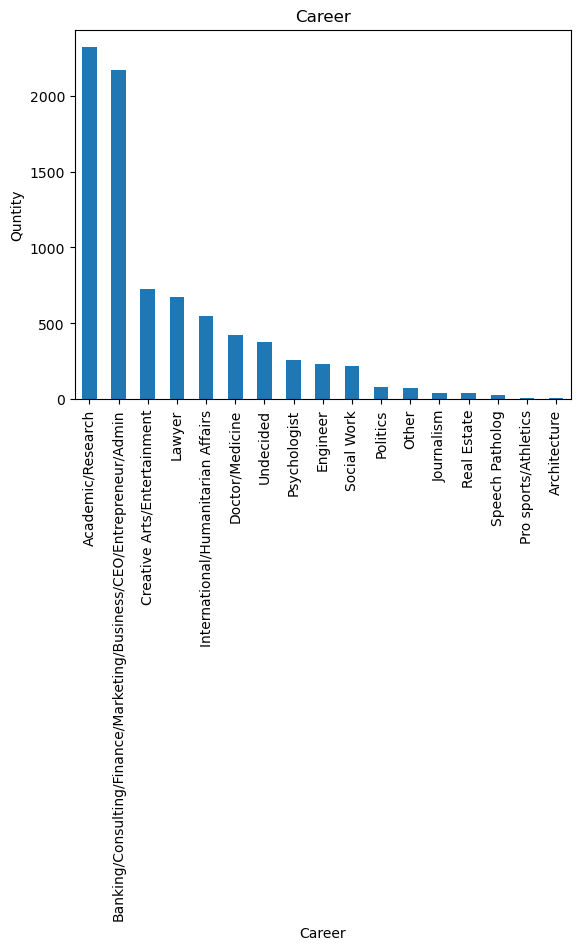

In [19]:
# The 'career_c' field plot
df['career_c_tmp'].value_counts().plot(kind = 'bar', xlabel = 'Career', ylabel = 'Quntity',  title = "Career")  

In [20]:
# Relations between race and career field
df.groupby(by='race_tmp')['career_c_tmp'].value_counts()

race_tmp                              career_c_tmp                                                        
Asian/Pacific Islander/Asian-America  Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin     593
                                      Academic/Research                                                        550
                                      Doctor/Medicine                                                          220
                                      Undecided                                                                183
                                      Lawyer                                                                   109
                                      Engineer                                                                 103
                                      Creative Arts/Entertainment                                               89
                                      International/Humanitarian Affairs                

In [21]:
# Delete temporary fields
del df['gender_tmp']
del df['race_tmp']
del df['career_c_tmp']

### Dating

In [22]:
# The 'goal' field analysis
goal_map = {
    1 : 'Seemed like a fun night out',
    2 : 'To meet new people',
    3 : 'To get a date',
    4 : 'Looking for a serious relationship',
    5 : 'To say I did it',
    6 : 'Other'}

df['goal_tmp'] = df['goal'].map(goal_map)
df['goal_tmp'].value_counts(normalize=True)

# Only 3.6% of the participants are looking for a serious relationship 

Seemed like a fun night out           0.412821
To meet new people                    0.362935
To get a date                         0.076033
To say I did it                       0.061453
Other                                 0.050488
Looking for a serious relationship    0.036269
Name: goal_tmp, dtype: float64

<Axes: title={'center': 'Goal'}, xlabel='Goal', ylabel='Quntity'>

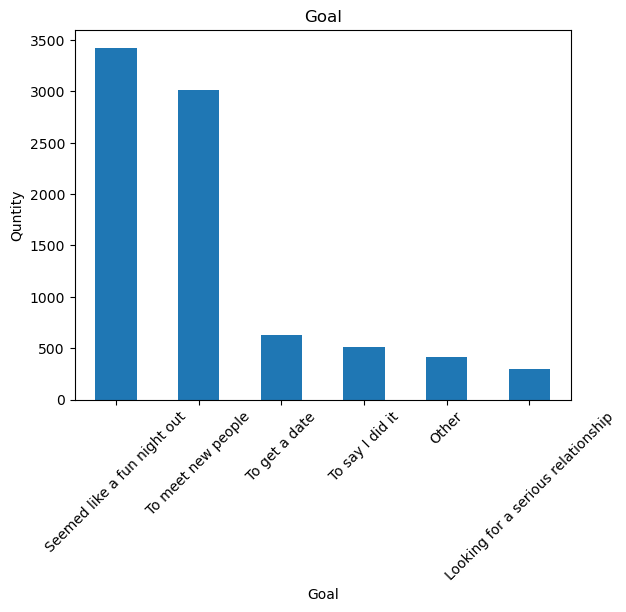

In [23]:
# The 'goal' field plot
df['goal_tmp'].value_counts().plot(kind = 'bar', rot = 45, xlabel = 'Goal', ylabel = 'Quntity',  title = "Goal")

In [24]:
# The 'date' field analysis
date_map = {
    1 : 'Several times a week',
    2 : 'Twice a week',
    3 : 'Once a week',
    4 : 'Twice a month',
    5 : 'Once a month',
    6 : 'Several times a year',
    7 : 'Almost never'}

df['date_tmp'] = df['date'].map(date_map)
df['date_tmp'].value_counts(normalize=True)


Several times a year    0.252868
Twice a month           0.246347
Once a month            0.184519
Almost never            0.173167
Once a week             0.094554
Twice a week            0.037194
Several times a week    0.011351
Name: date_tmp, dtype: float64

<Axes: title={'center': 'Date'}, xlabel='Date', ylabel='Quntity'>

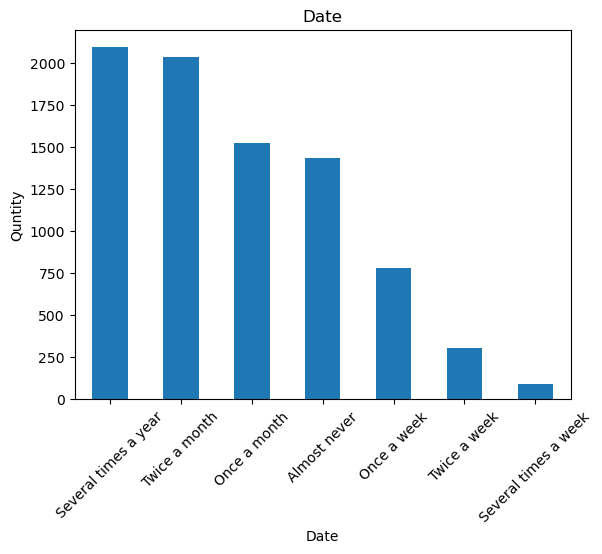

In [25]:
# The 'date' field plot
df['date_tmp'].value_counts().plot(kind = 'bar', rot = 45, xlabel = 'Date', ylabel = 'Quntity',  title = "Date")

In [26]:
# The 'go_out' field analysis
go_out_map = {
    1 : 'Several times a week',
    2 : 'Twice a week',
    3 : 'Once a week',
    4 : 'Twice a month',
    5 : 'Once a month',
    6 : 'Several times a year',
    7 : 'Almost never'
    }

df['go_out_tmp'] = df['go_out'].map(go_out_map)
df['go_out_tmp'].value_counts(normalize=True)

# Most of the participant go out at least on time a week

Twice a week            0.360284
Several times a week    0.314496
Once a week             0.234848
Twice a month           0.054223
Once a month            0.019761
Several times a year    0.011929
Almost never            0.004458
Name: go_out_tmp, dtype: float64

<Axes: title={'center': 'Go out'}, xlabel='Go out', ylabel='Quntity'>

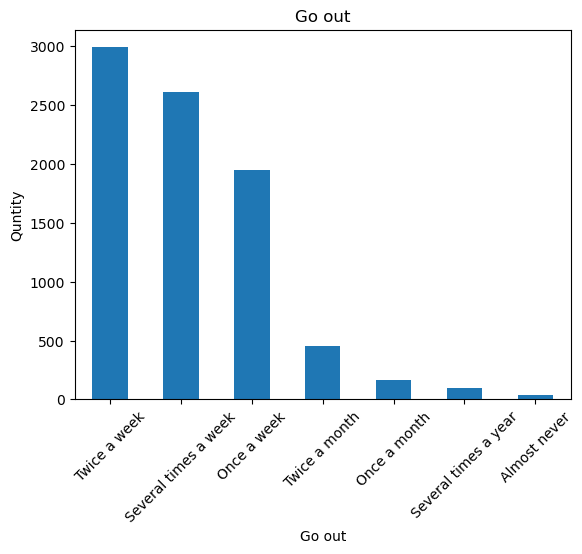

In [27]:
# The 'go_out' field plot
df['go_out_tmp'].value_counts().plot(kind = 'bar', rot = 45, xlabel = 'Go out', ylabel = 'Quntity',  title = "Go out")

In [28]:
# Relation between goal in participating in this event and frequency of going on date
df.groupby(by='goal_tmp')['date_tmp'].value_counts()

goal_tmp                            date_tmp            
Looking for a serious relationship  Once a month            122
                                    Several times a year     87
                                    Once a week              31
                                    Twice a month            18
                                    Twice a week             17
                                    Almost never             16
                                    Several times a week     10
Other                               Several times a year    114
                                    Twice a month            91
                                    Almost never             85
                                    Once a month             71
                                    Once a week              25
                                    Several times a week     18
                                    Twice a week             15
Seemed like a fun night out         Twice a mon

In [29]:
df_goal_date = df[['goal', 'date']]
df_goal_date.corr()

# Relation is very weak

,goal,date
goal,1.000000,0.050662
date,0.050662,1.000000


In [30]:
# Relation between frequency of goung out and frequency of going on date
df.groupby(by='go_out_tmp')['date_tmp'].value_counts()

go_out_tmp            date_tmp            
Almost never          Almost never             37
Once a month          Several times a year     80
                      Once a month             63
                      Almost never             21
Once a week           Several times a year    590
                      Almost never            414
                      Once a month            414
                      Twice a month           414
                      Once a week              82
                      Twice a week             35
Several times a week  Twice a month           783
                      Several times a year    416
                      Once a week             415
                      Once a month            343
                      Almost never            323
                      Twice a week            236
                      Several times a week     94
Several times a year  Several times a year     68
                      Once a month             22
       

In [31]:
df_goal_date = df[['go_out', 'date']]
df_goal_date.corr()

# Relation is not strong

,go_out,date
go_out,1.000000,0.336955
date,0.336955,1.000000


In [32]:
# Delete temporary fields
del df['go_out_tmp']
del df['date_tmp']
del df['goal_tmp']

### Bi-variate analysis

In [33]:
# If the partners match (match==1) which probability is that they are the same race
df[(df.samerace==1) & (df.match==1)].shape[0] / df[df.match==1].shape[0]

# 41%

0.4101449275362319

<Axes: title={'center': 'Age difference in years'}, xlabel='Age difference in years', ylabel='Quntity'>

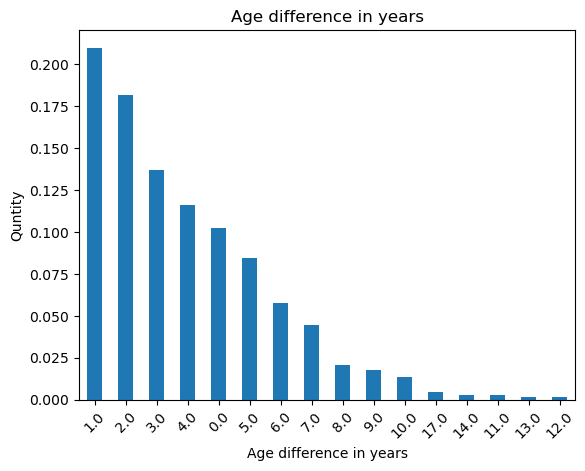

In [34]:
# If the partners match (match==1) which age difference they have
df_1 = df[df.match==1]

# Remove the rows with NAN from 'age' and 'age_o' columns
df_1 = df_1[df_1['age'].notna()]
df_1 = df_1[df_1['age_o'].notna()]

# Calculate difference
df_1['age_diff'] = abs(df_1['age'] - df_1['age_o'])

df_1['age_diff'].value_counts(normalize=True).plot(kind = 'bar', rot = 45, xlabel = 'Age difference in years', ylabel = 'Quntity',  title = "Age difference in years")

# If the partners match then the partners have small difference in age

In [35]:
# If the partners match (match==1) which career relation of the partners
pd.options.mode.chained_assignment = None
df_match = df[df.match==1]
dict_iid_career = dict(zip(df.iid, df.career_c))
df_match['partner_career_c'] = df_match['pid'].map(dict_iid_career)
df_match['career_c'] = df_match['career_c'].map(career_c_map)
df_match['partner_career_c'] = df_match['partner_career_c'].map(career_c_map)
match_careers = df_match.groupby(['partner_career_c', 'career_c']).size().reset_index().rename(columns={0:'count'})
match_careers

# Most common combinations:
#  Academic/Research - Academic/Research
#  Academic/Research - Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin
#  Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin - Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin

# Common combination:
#  Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin - Creative Arts/Entertainment
#  Lawyer - Lawyer
#  Lawyer - Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin
#  International/Humanitarian Affairs - Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin

,partner_career_c,career_c,count
0,Academic/Research,Academic/Research,142
1,Academic/Research,Banking/Consulting/Finance/Marketing/Business/...,101
2,Academic/Research,Creative Arts/Entertainment,27
3,Academic/Research,Doctor/Medicine,17
4,Academic/Research,Engineer,8
...,...,...,...
126,Undecided,Doctor/Medicine,6
127,Undecided,Engineer,3
128,Undecided,International/Humanitarian Affairs,2
129,Undecided,Lawyer,3


## Dating (analyze each question separately for each gender)

### What’s important for you (what you look for in the opposite sex)

#### During Sign-up questionnaire 

In [36]:
df['sum_feature'] = df['attr1_1'] + df['sinc1_1'] + df['intel1_1'] + df['fun1_1'] + df['amb1_1'] + df['shar1_1']
df['sum_feature'].value_counts()

# We can see that for all the waves is used the method of 100 points distribution between 6 attributes.
# Total points must equal 100.

100.00    7100
100.01     239
99.99      199
100.01     127
100.00     110
100.02      92
99.99       82
90.00       65
100.00      56
100.02      56
99.98       26
120.00      25
110.00      22
95.00       22
99.99       16
148.00      10
101.00      10
Name: sum_feature, dtype: int64

In [37]:
# But there are errors. The sums for some records are very different from 100.
err_iid = df[(df.sum_feature==148) | (df.sum_feature==120) | (df.sum_feature==110) | (df.sum_feature==95)][['wave', 'iid', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']]
err_iid.drop_duplicates(inplace=True)
err_iid

,wave,iid,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
580,2,44,25.0,15.0,25.0,25.0,15.0,15.0
908,3,66,20.0,25.0,15.0,15.0,53.0,20.0
6506,16,427,20.0,20.0,20.0,20.0,20.0,20.0
7608,21,518,20.0,25.0,25.0,30.0,5.0,5.0
7784,21,526,10.0,10.0,30.0,20.0,10.0,15.0


In [38]:
# For the iids: 44, 66, 427, 518, 526 the attributes values are wrong
err_iid.iid.unique()

array([ 44,  66, 427, 518, 526], dtype=int64)

#### During Half-way

In [39]:
df['sum_feature_s'] = df['attr1_s'] + df['sinc1_s'] + df['intel1_s'] + df['fun1_s'] + df['amb1_s'] + df['shar1_s']
df['sum_feature_s'].value_counts()

100.00    2263
99.99      240
100.01     193
100.01     171
100.00     102
99.99       71
100.02      66
110.00      63
49.00       58
100.00      56
51.00       52
39.00       51
52.00       49
47.00       45
105.00      42
45.00       40
120.00      40
90.00       39
41.00       37
38.00       36
99.99       30
100.01      30
43.00       30
42.00       30
95.00       28
44.00       27
48.00       22
46.00       21
96.00       21
101.00      18
100.02      16
58.00       15
36.00       15
33.00       15
31.00       12
99.98       10
50.00        6
30.00        6
55.00        6
53.00        6
97.00        6
80.00        6
32.00        6
Name: sum_feature_s, dtype: int64

In [40]:
# Example of the method of 100 points distribution between 6 attributes is used
res_100_s = df[(df.sum_feature_s==100)][['wave', 'iid', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s']]
res_100_s

,wave,iid,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s
1851,6,133,12.77,17.02,19.15,17.02,14.89,19.15
1852,6,133,12.77,17.02,19.15,17.02,14.89,19.15
1853,6,133,12.77,17.02,19.15,17.02,14.89,19.15
1854,6,133,12.77,17.02,19.15,17.02,14.89,19.15
1855,6,133,12.77,17.02,19.15,17.02,14.89,19.15
...,...,...,...,...,...,...,...,...
6799,17,453,20.00,20.00,15.00,15.00,15.00,15.00
6800,17,453,20.00,20.00,15.00,15.00,15.00,15.00
6801,17,453,20.00,20.00,15.00,15.00,15.00,15.00
6802,17,453,20.00,20.00,15.00,15.00,15.00,15.00


In [41]:
# Example of the method of rating the importance of the attributes on a scale of 1-10
res_50_s = df[(df.sum_feature_s==50)][['wave', 'iid', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s']]
res_50_s

# It means that these attributes both methods are used and we need to transform all the values to one method 

,wave,iid,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s
6804,18,454,7.0,9.0,9.0,9.0,7.0,9.0
6805,18,454,7.0,9.0,9.0,9.0,7.0,9.0
6806,18,454,7.0,9.0,9.0,9.0,7.0,9.0
6807,18,454,7.0,9.0,9.0,9.0,7.0,9.0
6808,18,454,7.0,9.0,9.0,9.0,7.0,9.0
6809,18,454,7.0,9.0,9.0,9.0,7.0,9.0


In [42]:
# But there are records with errors
mask = (df.sum_feature_s==120) | (df.sum_feature_s==105) | \
        (df.sum_feature_s==90) |  (df.sum_feature_s==80) |  (df.sum_feature_s==96)  
err_iid_s = df[mask][['wave', 'iid', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']]
err_iid_s.drop_duplicates(inplace=True)
err_iid_s

,wave,iid,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
3591,11,253,25.00,30.00,10.00,10.00,5.00,20.00
3633,11,255,16.67,16.67,16.67,16.67,16.67,16.67
3717,11,259,15.00,18.00,19.00,19.00,17.00,12.00
3822,11,264,15.00,15.00,25.00,20.00,5.00,20.00
4179,11,281,20.00,20.00,20.00,15.00,5.00,20.00
5839,15,384,20.00,20.00,20.00,20.00,20.00,0.00
6122,15,399,25.00,10.00,20.00,20.00,10.00,15.00
6476,16,422,30.00,25.00,20.00,10.00,10.00,5.00


In [43]:
# For the iids: 253, 255, 259, 264, 281, 384, 399, 422 the attributes values are wrong
# It seems to be used the method of 100 points distribution for these values
err_iid_s.iid.unique()

array([253, 255, 259, 264, 281, 384, 399, 422], dtype=int64)

In [44]:
res_less_80 = df[(df.sum_feature_s < 80)][['wave', 'iid', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s']]
res_less_80.drop_duplicates(inplace=True)
res_less_80

,wave,iid,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s
6804,18,454,7.0,9.0,9.0,9.0,7.0,9.0
6810,18,455,3.0,8.0,8.0,7.0,8.0,5.0
6816,18,456,9.0,9.0,8.0,7.0,8.0,8.0
6822,18,457,8.0,0.0,8.0,8.0,4.0,10.0
6828,18,458,10.0,10.0,10.0,10.0,8.0,5.0
6834,18,459,10.0,5.0,5.0,10.0,5.0,10.0
6840,18,460,8.0,10.0,10.0,9.0,9.0,9.0
6846,18,461,8.0,8.0,7.0,9.0,6.0,6.0
6852,18,462,7.0,8.0,4.0,5.0,3.0,4.0
6858,18,463,5.0,5.0,5.0,5.0,5.0,5.0


In [45]:
# Check values range
attr_df = res_less_80[['attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s']]
attr_df

,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s
6804,7.0,9.0,9.0,9.0,7.0,9.0
6810,3.0,8.0,8.0,7.0,8.0,5.0
6816,9.0,9.0,8.0,7.0,8.0,8.0
6822,8.0,0.0,8.0,8.0,4.0,10.0
6828,10.0,10.0,10.0,10.0,8.0,5.0
6834,10.0,5.0,5.0,10.0,5.0,10.0
6840,8.0,10.0,10.0,9.0,9.0,9.0
6846,8.0,8.0,7.0,9.0,6.0,6.0
6852,7.0,8.0,4.0,5.0,3.0,4.0
6858,5.0,5.0,5.0,5.0,5.0,5.0


In [46]:
print("\nMin:\n", attr_df.min(), "\nMax:\n", attr_df.max())

# The values seem to be set according to the method "1-10"
# Correct values, instead of 0, it shoud be converted to the 1 


Min:
 attr1_s     3.0
sinc1_s     0.0
intel1_s    4.0
fun1_s      2.0
amb1_s      1.0
shar1_s     1.0
dtype: float64 
Max:
 attr1_s     10.0
sinc1_s     10.0
intel1_s    10.0
fun1_s      10.0
amb1_s      10.0
shar1_s     10.0
dtype: float64


In [47]:
# Convert values from the method "1-10" to the "100 points" one

def convert_values_from__1_10__to__100_method(row, threshhold, sum_feature, attr, sinc, intel, fun, amb, shar = None):
    # less than 60 or equal then values of the row are set according to the "1-10" method
    if row[sum_feature] <= threshhold: 
        
        # if some value is 0 then set it to 1 (the least possible value)
        if row[attr] == 0:
            row[attr] = 1
        if row[sinc] == 0:
            row[sinc] = 1
        if row[intel] == 0:
            row[intel] = 1
        if row[fun] == 0:
            row[fun] = 1
        if row[amb] == 0:
            row[amb] = 1
        if shar != None and row[shar] == 0:
            row[shar] = 1
            
        # sum of all the six attrubites values
        val_sum = row[attr] + row[sinc] + row[intel] + row[fun] + row[amb]
        
        if shar != None:
            val_sum += row[shar]
         
        factor = 100.0 / val_sum
        
        row[attr] *= factor
        row[sinc] *= factor
        row[intel] *= factor
        row[fun] *= factor
        row[amb] *= factor
        if shar != None:
            row[shar] *= factor
        
        # now sum of all the six attrubites values is 100 
 
    return row

df = df.apply(lambda row : convert_values_from__1_10__to__100_method(row, 60, 'sum_feature_s', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s'), axis = 1)

#### Compare between both

In [48]:
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# Find differences between attributes
df['attr1_dif'] = abs(df['attr1_s']  - df['attr1_1'])
df['sinc1_dif'] = abs(df['sinc1_s']  - df['sinc1_1'])
df['intel1_dif'] = abs(df['intel1_s']  - df['intel1_1'])
df['fun1_dif']  = abs(df['fun1_s']  - df['fun1_1'])
df['amb1_dif']  = abs(df['amb1_s']  - df['amb1_1'])
df['shar1_dif'] = abs(df['shar1_s']  - df['shar1_1'])


df_dif = df[['iid', 'gender',
             'attr1_1', 'attr1_s', 'attr1_dif', 
             'sinc1_1', 'sinc1_s', 'sinc1_dif', 
             'intel1_1', 'intel1_s', 'intel1_dif',
             'fun1_1', 'fun1_s', 'fun1_dif', 
             'amb1_1', 'amb1_s', 'amb1_dif', 
             'shar1_1', 'shar1_s', 'shar1_dif']]

df_dif.drop_duplicates(inplace=True)
df_dif.dropna(inplace=True)

# Sum the differences of all the 6 attributes
df_dif['sum_dif'] = df_dif['attr1_dif'] + df_dif['sinc1_dif'] + df_dif['intel1_dif'] + df_dif['fun1_dif'] + df_dif['amb1_dif'] + df_dif['shar1_dif']

# Divide into males/females
df_dif_male = df_dif[df_dif['gender']==1]
df_dif_female = df_dif[df_dif['gender']==0]

In [49]:
# Males
df_dif_male

,iid,gender,attr1_1,attr1_s,attr1_dif,sinc1_1,sinc1_s,sinc1_dif,intel1_1,intel1_s,...,fun1_1,fun1_s,fun1_dif,amb1_1,amb1_s,amb1_dif,shar1_1,shar1_s,shar1_dif,sum_dif
1871,137,1,17.39,16.670000,0.720000,17.39,16.670000,0.720000,15.22,16.670000,...,17.39,18.750000,1.360000,13.04,12.500000,0.540000,19.57,18.750000,0.820000,5.610000
1876,138,1,20.00,19.570000,0.430000,20.00,19.570000,0.430000,20.00,19.570000,...,20.00,19.570000,0.430000,6.67,8.700000,2.030000,13.33,13.040000,0.290000,4.040000
1881,139,1,18.75,23.810000,5.060000,16.67,23.810000,7.140000,18.75,14.290000,...,20.83,23.810000,2.980000,12.50,2.380000,10.120000,12.50,11.900000,0.600000,30.360000
1886,140,1,18.60,20.000000,1.400000,16.28,15.560000,0.720000,18.60,17.780000,...,18.60,17.780000,0.820000,11.63,13.330000,1.700000,16.28,15.560000,0.720000,6.180000
1891,141,1,20.83,20.930000,0.100000,20.83,20.930000,0.100000,16.67,18.600000,...,16.67,18.600000,1.930000,6.25,4.650000,1.600000,18.75,16.280000,2.470000,8.130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,504,1,30.00,25.000000,5.000000,0.00,3.125000,3.125000,30.00,18.750000,...,15.00,25.000000,10.000000,15.00,12.500000,2.500000,10.00,15.625000,5.625000,37.500000
7386,505,1,20.00,19.230769,0.769231,14.00,17.307692,3.307692,18.00,17.307692,...,16.00,17.307692,1.307692,16.00,19.230769,3.230769,16.00,9.615385,6.384615,15.692308
7392,506,1,15.00,13.043478,1.956522,15.00,19.565217,4.565217,20.00,19.565217,...,15.00,15.217391,0.217391,15.00,17.391304,2.391304,20.00,15.217391,4.782609,14.347826
7398,507,1,20.00,15.555556,4.444444,20.00,20.000000,0.000000,20.00,17.777778,...,20.00,20.000000,0.000000,20.00,15.555556,4.444444,0.00,11.111111,11.111111,22.222222


<Axes: ylabel='Frequency'>

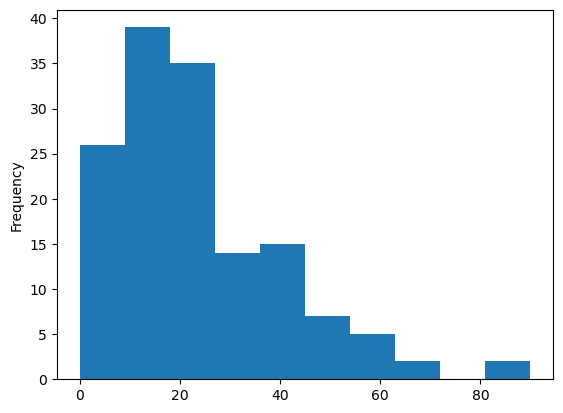

In [50]:
df_dif_male['sum_dif'].plot(kind='hist')

In [51]:
# Females
df_dif_female

,iid,gender,attr1_1,attr1_s,attr1_dif,sinc1_1,sinc1_s,sinc1_dif,intel1_1,intel1_s,...,fun1_1,fun1_s,fun1_dif,amb1_1,amb1_s,amb1_dif,shar1_1,shar1_s,shar1_dif,sum_dif
1846,132,0,16.67,16.670000,0.000000,16.67,16.670000,0.000000,16.67,16.670000,...,16.67,16.670000,0.000000,16.67,16.670000,0.000000,16.67,16.670000,0.000000,0.000000
1851,133,0,12.77,12.770000,0.000000,19.15,17.020000,2.130000,17.02,19.150000,...,17.02,17.020000,0.000000,14.89,14.890000,0.000000,19.15,19.150000,0.000000,4.260000
1856,134,0,6.67,6.670000,0.000000,20.00,22.220000,2.220000,20.00,20.000000,...,17.78,17.780000,0.000000,20.00,17.780000,2.220000,15.56,15.560000,0.000000,4.440000
1861,135,0,18.18,18.180000,0.000000,22.73,22.730000,0.000000,18.18,18.180000,...,13.64,13.640000,0.000000,13.64,13.640000,0.000000,13.64,13.640000,0.000000,0.000000
1896,142,0,14.29,14.580000,0.290000,14.29,16.670000,2.380000,21.43,20.830000,...,21.43,20.830000,0.600000,19.05,14.580000,4.470000,9.52,12.500000,2.980000,11.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7333,497,0,10.00,13.725490,3.725490,20.00,17.647059,2.352941,20.00,19.607843,...,20.00,19.607843,0.392157,20.00,17.647059,2.352941,10.00,11.764706,1.764706,10.980392
7340,498,0,18.00,19.230769,1.230769,18.00,13.461538,4.538462,18.00,19.230769,...,18.00,17.307692,0.692308,18.00,19.230769,1.230769,10.00,11.538462,1.538462,10.461538
7347,499,0,19.00,16.326531,2.673469,19.00,20.408163,1.408163,19.00,20.408163,...,19.00,20.408163,1.408163,5.00,4.081633,0.918367,19.00,18.367347,0.632653,8.448980
7354,500,0,10.00,15.555556,5.555556,15.00,15.555556,0.555556,35.00,22.222222,...,15.00,15.555556,0.555556,10.00,15.555556,5.555556,15.00,15.555556,0.555556,25.555556


<Axes: ylabel='Frequency'>

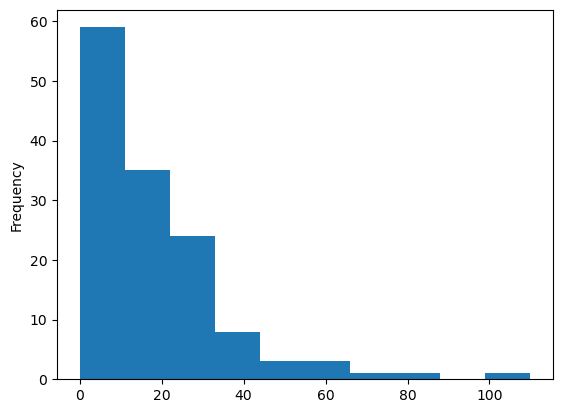

In [52]:
df_dif_female['sum_dif'].plot(kind='hist')

In [53]:
# remove temporary columns
del df['sum_feature']
del df['sum_feature_s']
del df['attr1_dif']
del df['sinc1_dif']
del df['intel1_dif']
del df['fun1_dif']
del df['amb1_dif']
del df['shar1_dif']

### What’s important for others of the same gender? (what you think MOST of your fellow men/women look for in the opposite sex)

In [54]:
df['sum_feature'] = df['attr4_1'] + df['sinc4_1'] + df['intel4_1'] + df['fun4_1'] + df['amb4_1'] + df['shar4_1']
df['sum_feature'].value_counts()

100.0    4708
46.0      169
45.0      106
42.0       98
41.0       92
44.0       81
50.0       76
47.0       72
48.0       72
110.0      68
54.0       68
35.0       66
43.0       62
38.0       62
40.0       62
51.0       60
36.0       56
53.0       46
49.0       41
27.0       40
37.0       40
34.0       40
52.0       36
80.0       34
90.0       32
95.0       22
30.0       20
60.0       20
58.0       20
82.0       19
98.0       18
33.0       16
32.0       16
39.0       10
56.0       10
105.0       9
Name: sum_feature, dtype: int64

In [55]:
# But there are records with errors for the method of 100 points
mask = (df.sum_feature==110) | (df.sum_feature==105) | (df.sum_feature==95) | (df.sum_feature==80) | \
        (df.sum_feature==90) |  (df.sum_feature==82) |  (df.sum_feature==98)  
err_iid_s = df[mask][['wave', 'iid', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']]
err_iid_s.drop_duplicates(inplace=True)
err_iid_s

,wave,iid,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
3543,10,249,35.0,15.0,5.0,25.0,5.0,20.0
3591,11,253,30.0,20.0,10.0,25.0,5.0,20.0
4816,12,320,20.0,10.0,10.0,10.0,20.0,10.0
5024,14,341,20.0,10.0,20.0,20.0,0.0,40.0
5384,14,361,30.0,20.0,10.0,10.0,0.0,10.0
5915,15,388,20.0,15.0,14.0,16.0,1.0,16.0
6086,15,397,27.0,18.0,14.0,25.0,5.0,9.0
6320,15,410,50.0,10.0,10.0,10.0,5.0,5.0
6594,17,435,50.0,2.0,8.0,45.0,1.0,4.0
6636,17,438,20.0,12.0,15.0,15.0,14.0,14.0


In [56]:
res_less_80 = df[(df.sum_feature < 80)][['wave', 'iid', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']]
res_less_80.drop_duplicates(inplace=True)
res_less_80

,wave,iid,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
1846,6,132,10.0,7.0,7.0,7.0,5.0,7.0
1851,6,133,7.0,7.0,7.0,7.0,6.0,7.0
1856,6,134,6.0,9.0,9.0,7.0,7.0,6.0
1861,6,135,8.0,8.0,8.0,9.0,9.0,7.0
1871,6,137,9.0,6.0,5.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...
3308,9,229,10.0,4.0,4.0,10.0,1.0,1.0
3328,9,230,10.0,10.0,10.0,10.0,10.0,10.0
3348,9,231,9.0,3.0,4.0,9.0,8.0,8.0
3368,9,232,9.0,7.0,8.0,7.0,7.0,7.0


In [57]:
print("\nMin:\n", res_less_80.min(), "\nMax:\n", res_less_80.max())

# attributes columns have the correct range (1-10)


Min:
 wave          6.0
iid         132.0
attr4_1       5.0
sinc4_1       3.0
intel4_1      2.0
fun4_1        4.0
amb4_1        1.0
shar4_1       1.0
dtype: float64 
Max:
 wave          9.0
iid         233.0
attr4_1      10.0
sinc4_1      10.0
intel4_1     10.0
fun4_1       10.0
amb4_1       10.0
shar4_1      10.0
dtype: float64


In [58]:
# Convert values from the method "1-10" to the "100 points" one
df = df.apply(lambda row : convert_values_from__1_10__to__100_method(row, 60, 'sum_feature', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1'), axis = 1)

In [59]:
warnings.simplefilter(action='ignore', category=FutureWarning)
df_attr_4 = df[['gender', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']]
df_attr_4.drop_duplicates(inplace=True)
df_attr_4.dropna(inplace=True)
df_attr_4['gender'] = df_attr_4['gender'].map(gender_map)
df_attr_4.groupby(by='gender')['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1'].mean()  

,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
gender,,,,,,
Female,26.251046,13.646990,15.325496,17.310890,14.170147,13.279215
Male,30.747600,13.159726,14.361059,19.147155,9.318527,13.070166


In [60]:
# remove temporary columns
del df['sum_feature']

### What’s important for others of the opposite gender? (what do you think the opposite sex looks for in a date)

In [61]:
df['sum_feature'] = df['attr2_1'] + df['sinc2_1'] + df['intel2_1'] + df['fun2_1'] + df['amb2_1'] + df['shar2_1']
df['sum_feature'].value_counts()

100.00    6983
100.02     192
100.01     179
100.01     157
99.99      147
110.00     106
100.00     104
99.99       81
90.00       69
105.00      59
100.02      56
95.00       37
99.99       30
99.98       20
100.03      16
80.00       14
112.00      14
101.00      10
100.02      10
100.00       5
Name: sum_feature, dtype: int64

In [62]:
# Records with errors for the method of 100 points
mask = (df.sum_feature==110) | (df.sum_feature==105) | (df.sum_feature==112) | (df.sum_feature==80) | \
        (df.sum_feature==90) |  (df.sum_feature==95)  
err_iid_s = df[mask][['wave', 'iid', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']]
err_iid_s.drop_duplicates(inplace=True)
err_iid_s

,wave,iid,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1
1656,5,112,45.0,15.0,10.0,20.0,0.0,5.0
1666,5,113,30.0,5.0,15.0,25.0,10.0,20.0
3471,10,241,90.0,5.0,2.0,3.0,0.0,5.0
3591,11,253,40.0,20.0,5.0,20.0,5.0,20.0
3885,11,267,20.0,30.0,20.0,10.0,20.0,10.0
3927,11,269,30.0,10.0,10.0,30.0,5.0,10.0
4816,12,320,20.0,10.0,10.0,10.0,20.0,10.0
5168,14,349,50.0,5.0,20.0,30.0,5.0,0.0
5240,14,353,18.0,18.0,19.0,19.0,18.0,18.0
5258,14,354,40.0,5.0,10.0,25.0,15.0,15.0


In [63]:
df_attr_2 = df[['gender', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']]
df_attr_2.drop_duplicates(inplace=True)
df_attr_2.dropna(inplace=True)
df_attr_2['gender'] = df_attr_2['gender'].map(gender_map)
df_attr_2.groupby(by='gender')['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1'].mean() 

,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1
gender,,,,,,
Female,35.300925,11.362379,12.589207,19.178899,9.043260,12.710661
Male,24.852405,14.921435,16.488312,18.125865,14.538439,10.973376


In [64]:
# remove temporary columns
del df['sum_feature']

## Me vs. others (bar/histogram)

### How do I perceive myself? (how do you think you measure up?) 

In [65]:
df['sum_feature'] = df['attr3_1'] + df['sinc3_1'] + df['intel3_1'] + df['fun3_1'] + df['amb3_1'] 
df['sum_feature'].value_counts()
# We can see that all the values are used according to the method "1-10"

40.0    888
42.0    803
38.0    678
39.0    671
41.0    631
37.0    621
35.0    472
43.0    472
36.0    428
45.0    386
33.0    327
44.0    312
46.0    276
34.0    244
32.0    214
30.0    171
31.0    162
50.0    133
48.0    114
47.0     63
29.0     56
25.0     43
49.0     26
28.0     25
23.0     19
24.0     18
26.0     10
18.0     10
Name: sum_feature, dtype: int64

In [66]:
df_attr_3 = df[['iid', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']]
df_attr_3.drop_duplicates(inplace=True)
df_attr_3.dropna(inplace=True)

In [67]:
# Check the values range
df_attr_3.min()

iid         1.0
attr3_1     2.0
sinc3_1     2.0
intel3_1    3.0
fun3_1      2.0
amb3_1      2.0
dtype: float64

In [68]:
df_attr_3.max()

# Values are in the correct range

iid         552.0
attr3_1      10.0
sinc3_1      10.0
intel3_1     10.0
fun3_1       10.0
amb3_1       10.0
dtype: float64

<Axes: title={'center': 'Attractive'}, xlabel='Attractive', ylabel='Quntity'>

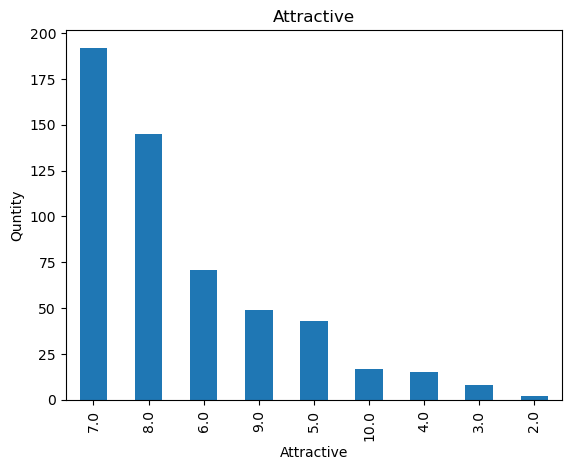

In [69]:
# Attractive
df_attr_3['attr3_1'].value_counts().plot(kind='bar', xlabel = 'Attractive', ylabel = 'Quntity',  title = "Attractive")

<Axes: title={'center': 'Sincere'}, xlabel='Sincere', ylabel='Quntity'>

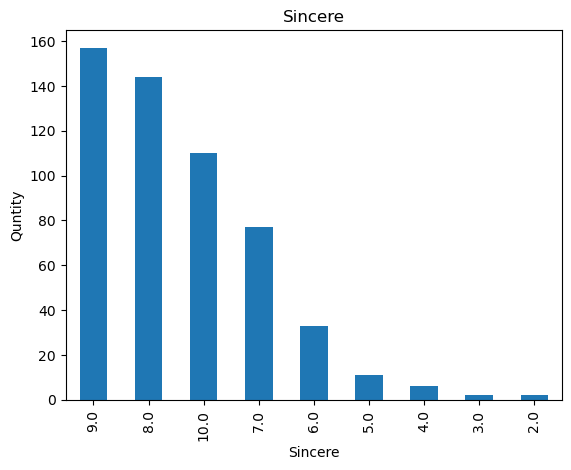

In [70]:
# Sincere
df_attr_3['sinc3_1'].value_counts().plot(kind='bar', xlabel = 'Sincere', ylabel = 'Quntity',  title = "Sincere")

<Axes: title={'center': 'Intelligent'}, xlabel='Intelligent', ylabel='Quntity'>

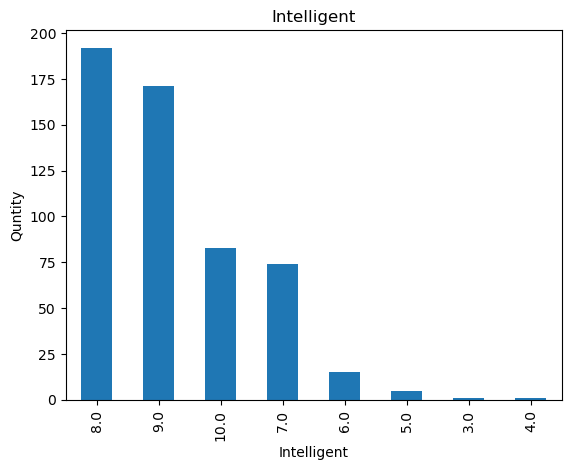

In [71]:
# Intelligent
df_attr_3['intel3_1'].value_counts().plot(kind='bar', xlabel = 'Intelligent', ylabel = 'Quntity',  title = "Intelligent")

<Axes: title={'center': 'Fun'}, xlabel='Fun', ylabel='Quntity'>

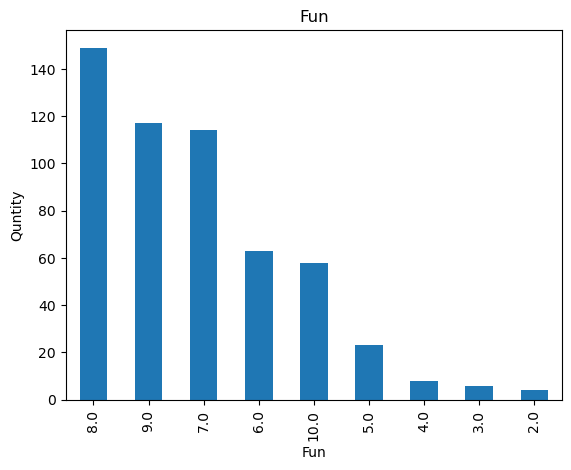

In [72]:
# Fun
df_attr_3['fun3_1'].value_counts().plot(kind='bar', xlabel = 'Fun', ylabel = 'Quntity',  title = "Fun")

<Axes: title={'center': 'Ambitious'}, xlabel='Ambitious', ylabel='Quntity'>

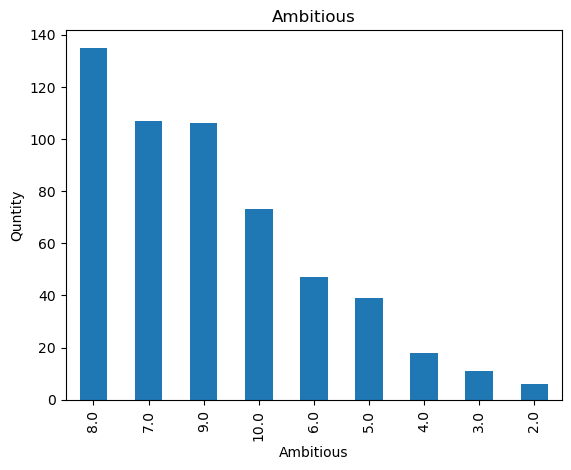

In [73]:
# Ambitious
df_attr_3['amb3_1'].value_counts().plot(kind='bar', xlabel = 'Ambitious', ylabel = 'Quntity',  title = "Ambitious")

### How do I think others perceive me? (how do you think others perceive you?) 

In [74]:
df['sum_feature'] = df['attr5_1'] + df['sinc5_1'] + df['intel5_1'] + df['fun5_1'] + df['amb5_1'] 
df['sum_feature'].value_counts()

# We can see that all the values are used according to the method "1-10"

42.0    536
41.0    396
36.0    390
40.0    372
37.0    309
39.0    302
38.0    298
35.0    279
34.0    254
32.0    218
44.0    178
33.0    171
43.0    167
31.0    153
30.0    150
45.0    148
46.0    111
50.0     97
48.0     90
47.0     74
27.0     56
26.0     42
25.0     38
29.0     37
18.0     19
28.0     12
22.0      9
Name: sum_feature, dtype: int64

In [75]:
df_attr_5 = df[['iid', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']]
df_attr_5.drop_duplicates(inplace=True)
df_attr_5.dropna(inplace=True)

In [76]:
# Check the values range
df_attr_5.min()

iid         234.0
attr5_1       2.0
sinc5_1       1.0
intel5_1      3.0
fun5_1        2.0
amb5_1        1.0
dtype: float64

In [77]:
df_attr_5.max()

# Values are in the correct range

iid         552.0
attr5_1      10.0
sinc5_1      10.0
intel5_1     10.0
fun5_1       10.0
amb5_1       10.0
dtype: float64

<Axes: title={'center': 'Attractive'}, xlabel='Attractive', ylabel='Quntity'>

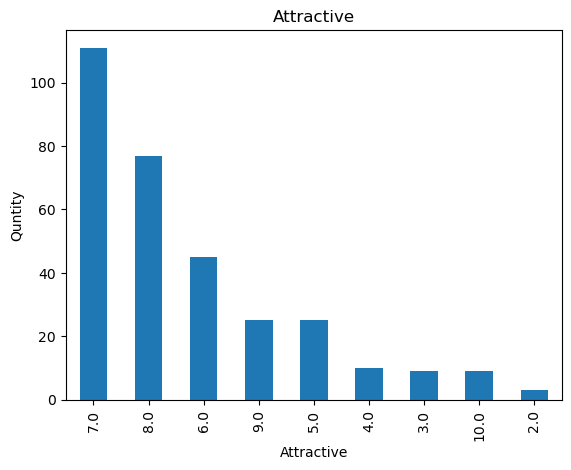

In [78]:
# Attractive
df_attr_5['attr5_1'].value_counts().plot(kind='bar', xlabel = 'Attractive', ylabel = 'Quntity',  title = "Attractive")

<Axes: title={'center': 'Sincere'}, xlabel='Sincere', ylabel='Quntity'>

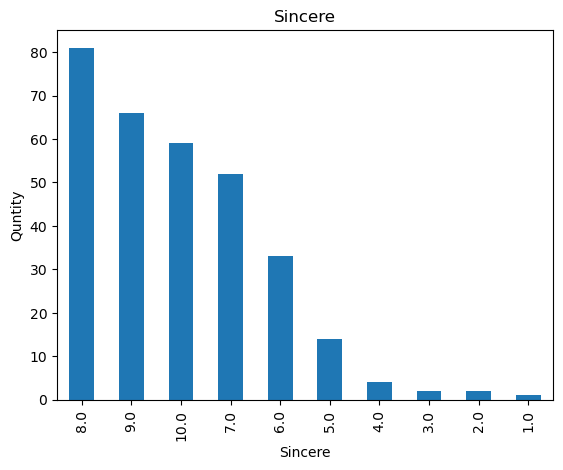

In [79]:
# Sincere
df_attr_5['sinc5_1'].value_counts().plot(kind='bar', xlabel = 'Sincere', ylabel = 'Quntity',  title = "Sincere")

<Axes: title={'center': 'Intelligent'}, xlabel='Intelligent', ylabel='Quntity'>

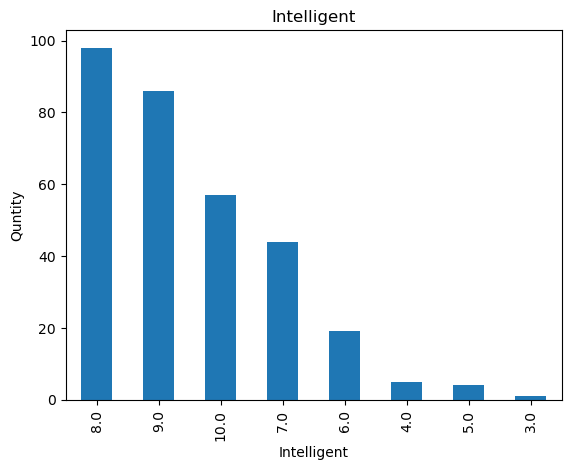

In [80]:
# Intelligent
df_attr_5['intel5_1'].value_counts().plot(kind='bar', xlabel = 'Intelligent', ylabel = 'Quntity',  title = "Intelligent")

<Axes: title={'center': 'Fun'}, xlabel='Fun', ylabel='Quntity'>

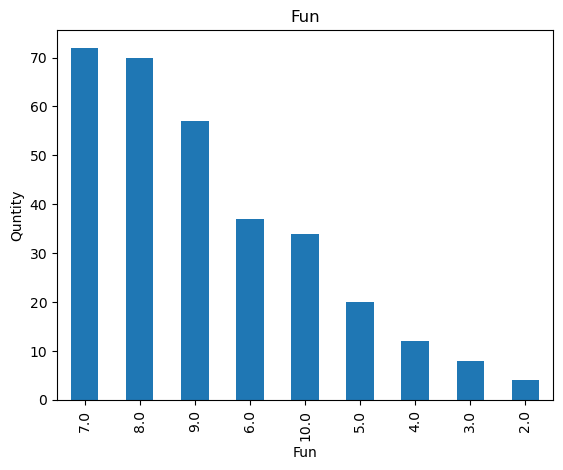

In [81]:
# Fun
df_attr_5['fun5_1'].value_counts().plot(kind='bar', xlabel = 'Fun', ylabel = 'Quntity',  title = "Fun")

<Axes: title={'center': 'Ambitious'}, xlabel='Ambitious', ylabel='Quntity'>

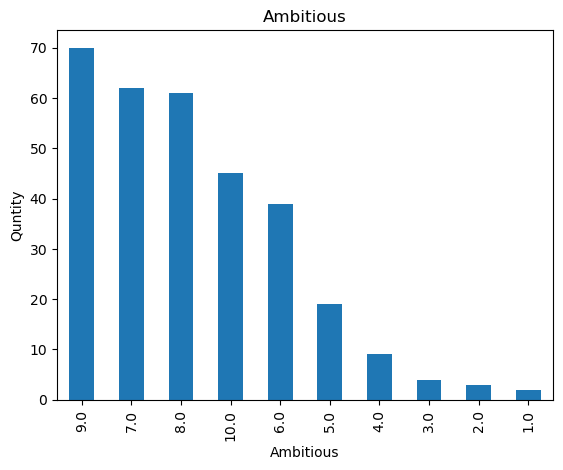

In [82]:
# Ambitious
df_attr_5['amb5_1'].value_counts().plot(kind='bar', xlabel = 'Ambitious', ylabel = 'Quntity',  title = "Ambitious")

### How do others actually perceive me? 

In [83]:
# Check the columns containing information how do others percieve the person
df[['attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2',
    'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3']].isnull().sum()

# We can see that for most dates such information missing
# Most of people do not fill the relevant forms and we cannot know their final perception 

attr7_2     6394
sinc7_2     6423
intel7_2    6394
fun7_2      6394
amb7_2      6423
shar7_2     6404
attr7_3     6362
sinc7_3     6362
intel7_3    6362
fun7_3      6362
amb7_3      6362
shar7_3     6362
dtype: int64

In [84]:
# So we will use the partners feedbacks received the night of the event
partner_feedback = df.sort_values(['gender', 'iid'])
gender_map = {0 : 'Female', 1 : 'Male'}
partner_feedback['gender'] = partner_feedback['gender'].map(gender_map)
partner_feedback = partner_feedback[['gender', 'iid', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']]
partner_feedback
# Here we can see feedbacks of partners for each person

,gender,iid,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,Female,1,6.0,8.0,8.0,8.0,8.0,6.0
1,Female,1,7.0,8.0,10.0,7.0,7.0,5.0
2,Female,1,10.0,10.0,10.0,10.0,10.0,10.0
3,Female,1,7.0,8.0,9.0,8.0,9.0,8.0
4,Female,1,8.0,7.0,9.0,6.0,9.0,7.0
...,...,...,...,...,...,...,...,...
8373,Male,552,10.0,5.0,3.0,2.0,6.0,5.0
8374,Male,552,6.0,3.0,7.0,3.0,7.0,2.0
8375,Male,552,2.0,1.0,2.0,2.0,2.0,1.0
8376,Male,552,5.0,7.0,5.0,5.0,3.0,6.0


In [85]:
# Get an info for each person
partner_feedback_info = partner_feedback.groupby(['gender', 'iid']).agg({'attr_o':['min', 'mean', 'max', 'std'], 
                                            'sinc_o':['min', 'mean', 'max', 'std'], 
                                            'intel_o':['min', 'mean', 'max', 'std'], 
                                            'fun_o':['min', 'mean', 'max', 'std'], 
                                            'amb_o':['min', 'mean', 'max', 'std'], 
                                            'shar_o':['min', 'mean', 'max', 'std']})
partner_feedback_info

attr_o                           sinc_o                            \
              min      mean   max       std    min      mean   max       std   
gender iid                                                                     
Female 1      3.0  6.700000  10.0  1.766981    6.0  7.400000  10.0  1.173788   
       2      5.0  7.700000  10.0  1.636392    3.0  7.100000  10.0  2.233582   
       3      4.0  6.500000  10.0  1.581139    3.0  7.100000  10.0  2.233582   
       4      6.0  7.000000  10.0  1.247219    5.0  7.100000  10.0  1.370320   
       5      2.0  5.300000  10.0  2.110819    3.0  7.700000  10.0  2.213594   
...           ...       ...   ...       ...    ...       ...   ...       ...   
Male   548    2.0  6.857143  10.0  1.768777    2.0  5.809524   8.0  1.691717   
       549    1.0  6.350000  10.0  2.183069    2.0  6.650000   9.0  2.183069   
       550    2.0  5.136364   8.0  1.698612    1.0  5.818182   8.0  2.238970   
       551    3.0  6.142857  10.0  1.930951    4.0  6.666667   9.0  1.712698   
       552    2.0  7.300000  10.0  1.894591    1.0  5.850000   9.0  2.254236   

           intel_o            ... fun_o           amb_o                  \
               min      mean  ...   max       std   min      mean   max   
gender iid                    ...                                         
Female 1       5.0  8.000000  ...  10.0  1.475730   6.0  8.000000  10.0   
       2       4.0  7.900000  ...  10.0  2.321398   5.0  7.500000  10.0   
       3       5.0  7.300000  ...  10.0  1.932184   5.0  7.111111  10.0   
       4       3.0  7.700000  ...  10.0  1.715938   6.0  7.700000  10.0   
       5       4.0  7.600000  ...  10.0  1.751190   5.0  7.800000  10.0   
...            ...       ...  ...   ...       ...   ...       ...   ...   
Male   548     2.0  6.666667  ...   9.0  1.230563   2.0  6.150000   8.0   
       549     2.0  6.850000  ...  10.0  1.725200   2.0  6.000000   8.0   
       550     2.0  6.500000  ...   9.0  2.027943   2.0  6.363636   9.0   
       551     4.0  6.761905  ...  10.0  2.111195   4.0  6.238095   9.0   
       552     2.0  6.157895  ...   8.0  2.099499   2.0  6.150000   8.0   

                     shar_o                            
                 std    min      mean   max       std  
gender iid                                             
Female 1    1.154701    5.0  7.100000  10.0  1.523884  
       2    1.509231    3.0  6.500000  10.0  2.223611  
       3    1.536591    4.0  6.000000  10.0  2.061553  
       4    1.418136    5.0  7.200000  10.0  2.149935  
       5    2.043961    3.0  6.200000  10.0  2.250926  
...              ...    ...       ...   ...       ...  
Male   548  1.843195    2.0  4.450000   7.0  1.571958  
       549  1.732051    1.0  5.111111   8.0  1.676442  
       550  1.648822    1.0  4.190476   7.0  1.833550  
       551  1.546116    1.0  5.166667   8.0  2.121320  
       552  1.725200    1.0  5.000000   9.0  2.285218  

[551 rows x 24 columns]

In [86]:
# Get average of stamdard deviations for each feature grouped by gender
partner_feedback_info_std = partner_feedback_info.groupby(['gender'])[[('attr_o', 'std'), 
                                                                       ('sinc_o', 'std'),
                                                                       ('intel_o', 'std'),
                                                                       ('fun_o', 'std'),
                                                                       ('amb_o', 'std'),
                                                                       ('shar_o', 'std'),]].mean()
partner_feedback_info_std

# Female partners give values with larger standard deviation

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
,std,std,std,std,std,std
gender,,,,,,
Female,1.513443,1.514105,1.385010,1.633154,1.597170,1.950061
Male,1.621332,1.666538,1.454833,1.760283,1.689116,2.025489


### How many do you expect will be interested in dating you vs. actual (agg. of dec_o)? 

In [87]:
# Partners decisions for each person information
df_match_dec = df[['iid', 'pid', 'dec_o']]
df_match_dec

,iid,pid,dec_o
0,1,11.0,0
1,1,12.0,0
2,1,13.0,1
3,1,14.0,1
4,1,15.0,1
...,...,...,...
8373,552,526.0,1
8374,552,527.0,0
8375,552,528.0,0
8376,552,529.0,1


In [88]:
# Get popularity value for each person, how many positive decisions he/she received
partner_decision = df_match_dec.groupby('iid').agg({'dec_o':['count', 'sum']})
partner_decision['positive partner decision'] = partner_decision[('dec_o', 'sum')] / partner_decision[('dec_o', 'count')]
# Sort the values to see the most popular persons
partner_decision = partner_decision.sort_values(by=['positive partner decision'], ascending=False)
partner_decision

dec_o     positive partner decision
    count sum                          
iid                                    
208    20  20                  1.000000
456     6   6                  1.000000
132     5   5                  1.000000
268    21  20                  0.952381
207    20  19                  0.950000
..    ...  ..                       ...
502     6   0                  0.000000
503     6   0                  0.000000
506     6   0                  0.000000
124    10   0                  0.000000
302    14   0                  0.000000

[551 rows x 3 columns]

## Effects of experiment setup/surroundings (% match by:) 

### Date order 

In [89]:
# Get all the rows where the partners match (match=1)
df_match = df[df['match']==1]

In [90]:
# most "effective" order
order_match = df_match['order'].value_counts()
order_match

# most effective order is 127

1     127
9     101
4      99
5      97
3      91
2      88
6      88
10     84
7      79
8      79
11     61
13     57
14     54
12     46
15     44
16     41
18     40
19     33
17     29
20     26
22     10
21      6
Name: order, dtype: int64

### Station number (is there any “lucky table”?) 

In [91]:
# most "lucky" station
position_match = df_match['position'].value_counts()
position_match

# station 10

10    100
3      98
7      96
6      94
11     94
5      92
1      86
2      86
8      80
9      80
15     76
4      66
12     62
16     46
13     42
18     40
17     40
14     36
19     28
20     14
21     12
22     12
Name: position, dtype: int64

### Waves 

In [92]:
# Find the waves with most matches (relation of number of matches to all the meetings in the wave)
df_match = df[df['match']==1]

waves = df['wave'].value_counts().to_frame()
waves.reset_index(inplace=True)
waves = waves.rename(columns = {'index':'wave_ind', 'wave':'num_meet'})

wave_match = df_match['wave'].value_counts().to_frame()
wave_match.reset_index(inplace=True)
wave_match = wave_match.rename(columns = {'index':'wave_ind', 'wave':'num_meet_match'})

merged_wave_match = wave_match.merge(waves, on='wave_ind')
merged_wave_match['matches_per_waves'] = wave_match['num_meet_match'] / waves['num_meet']
merged_wave_match = merged_wave_match.sort_values('matches_per_waves', ascending=False)
merged_wave_match

# We can see the most "effective" waves: 16, 17

,wave_ind,num_meet_match,num_meet,matches_per_waves
17,16,24,96,0.250000
11,17,48,280,0.240000
12,12,42,392,0.210000
10,5,54,190,0.192857
5,9,124,800,0.191358
4,14,126,720,0.184211
13,8,36,200,0.180000
3,15,126,684,0.175000
14,13,32,180,0.168421
15,10,30,162,0.166667


## Towards predicting a decision (correlations analysis) 

### Divide features to me/other/other-on-me data 

In [93]:
# Me data

# iid of a participant (can be 1-552)
iid = 2  # example: participant 2

# data about the participant
me_fields = ['iid', 'wave', 'gender', 'age', 'race', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition',
             'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 
             
             # activities
             'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 
             'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
             
             # rating and decision
             'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met',
            
             # rate your opinion of your own attributes
             'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1', 
             # what you look for in the opposite sex
             'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
                         
             # rate your opinion of your own attributes - half way
             'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s',
             # what you look for in the opposite sex - half way
             'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s',         
                     
             # rate your opinion of your own attributes - time 2
             'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2',     
             # what you look for in the opposite sex - time 2
             'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2',
             # rating - time 2
             'attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2',
             
             # rate your opinion of your own attributes - time 3
             'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3',
             # what you look for in the opposite sex - time 3
             'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3',
             # rating - time 3
             'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3',
            ]

# get the information about the participant
me_data = df[df['iid']==iid][me_fields]
me_data.drop_duplicates(inplace=True)
me_data

,iid,wave,gender,age,race,field,field_cd,undergra,mn_sat,tuition,...,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3
10,2,1,0,24.0,2.0,law,1.0,NaN,NaN,NaN,...,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
11,2,1,0,24.0,2.0,law,1.0,NaN,NaN,NaN,...,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
12,2,1,0,24.0,2.0,law,1.0,NaN,NaN,NaN,...,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
13,2,1,0,24.0,2.0,law,1.0,NaN,NaN,NaN,...,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
14,2,1,0,24.0,2.0,law,1.0,NaN,NaN,NaN,...,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
15,2,1,0,24.0,2.0,law,1.0,NaN,NaN,NaN,...,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
16,2,1,0,24.0,2.0,law,1.0,NaN,NaN,NaN,...,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
17,2,1,0,24.0,2.0,law,1.0,NaN,NaN,NaN,...,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
18,2,1,0,24.0,2.0,law,1.0,NaN,NaN,NaN,...,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
19,2,1,0,24.0,2.0,law,1.0,NaN,NaN,NaN,...,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# Other (partner) data

# data about the partner
other_fields = ['iid', 'pid', 'age_o',  'race_o', 
                
                # partner’s stated preference at Time 
                'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha',
                
                # MOST of your fellow men/women look for in the opposite sex
                'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1',
                # the opposite sex looks for in a date
                'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
                
                # MOST of your fellow men/women look for in the opposite sex - time 2
                'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2',
                # the opposite sex looks for in a date - time 2
                'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2',
                
                # MOST of your fellow men/women look for in the opposite sex - time 3
                'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3',
                # the opposite sex looks for in a date - time 3
                'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3',
            
            ]

# get the information about the partner
other_data = df[df['iid']==iid][other_fields]
other_data.drop_duplicates(inplace=True)
other_data

,iid,pid,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,...,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3
10,2,11.0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2,12.0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2,13.0,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2,14.0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2,15.0,24.0,3.0,30.00,10.00,20.00,10.00,10.00,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2,16.0,25.0,2.0,50.00,0.00,30.00,10.00,0.00,10.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,2,17.0,30.0,2.0,35.00,15.00,25.00,10.00,5.00,10.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2,18.0,27.0,2.0,33.33,11.11,11.11,11.11,11.11,22.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2,19.0,28.0,2.0,50.00,0.00,25.00,10.00,0.00,15.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2,20.0,24.0,2.0,100.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Other-on-me data
other_on_me_fields = ['iid', 'pid',
                
                # rating by partner the night of the event and decision
                'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o',
                 
                # how do you think others perceive you
                'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1',
              
                # how do you think others perceive you - time 2
                'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2',
                
                # how do you think others perceive you - time 3
                'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3',
            
            ]
other_on_me_data = df[df['iid']==iid][other_on_me_fields]
other_on_me_data.drop_duplicates(inplace=True)
other_on_me_data

,iid,pid,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,...,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
10,2,11.0,0,8.0,7.0,6.0,9.0,7.0,4.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2,12.0,0,7.0,6.0,10.0,6.0,6.0,5.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2,13.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2,14.0,1,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2,15.0,1,10.0,10.0,10.0,10.0,7.0,8.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2,16.0,1,7.0,8.0,7.0,5.0,7.0,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,2,17.0,0,5.0,3.0,4.0,3.0,5.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2,18.0,1,7.0,7.0,7.0,7.0,7.0,5.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2,19.0,1,8.0,6.0,9.0,9.0,8.0,7.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2,20.0,0,6.0,5.0,7.0,7.0,9.0,7.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### My/other/other-on-me data vs. my/other target (decision/decision_o) 

In [96]:
# correlation between attribute and decisions
def correlation_attribute2decision(df, attribute):

    df_dec_summary = df.groupby(['iid', attribute]).agg({attribute:'count', 'dec':'sum', 'dec_o':'sum'})
    df_dec_summary = df_dec_summary.rename(columns = {attribute:'quantity'})
    # relation between number of the 'my positive decision' and the number of partners
    df_dec_summary['my positive decision'] = df_dec_summary['dec'] / df_dec_summary['quantity']
    # relation between number of the 'positive partner decision' and the number of partners
    df_dec_summary['positive partner decision'] = df_dec_summary['dec_o'] / df_dec_summary['quantity']
    df_dec_summary.reset_index(inplace=True)
    
    # correlation beween the "attribute" values and the 'my positive decision' one
    df_dec_summary_dec_mean = df_dec_summary.groupby(attribute)['my positive decision'].mean().to_frame()
    df_dec_summary_dec_mean.reset_index(inplace=True)
    dec_corr = df_dec_summary_dec_mean[attribute].corr(df_dec_summary_dec_mean['my positive decision'])
    
    # correlation beween the "attribute" values and the 'positive partner decision' one
    df_dec_summary_dec_o_mean = df_dec_summary.groupby(attribute)['positive partner decision'].mean().to_frame()
    df_dec_summary_dec_o_mean.reset_index(inplace=True)
    dec_o_corr = df_dec_summary_dec_o_mean[attribute].corr(df_dec_summary_dec_o_mean['positive partner decision'])
    
    return (dec_corr, dec_o_corr)

In [97]:
# 'rate your opinion of your own attributes' fields
attribute = 'attr3_1' # 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1'
(dec_corr, dec_o_corr) = correlation_attribute2decision(df, attribute)

#              'attr3_1'    'sinc3_1'    'intel3_1'   'fun3_1'   'amb3_1'
# dec_corr      -0.52        -0.12        -0.04        -0.43      -0.42
# dec_o_corr     0.91        -0.60        -0.01         0.86       0.74

# correlation between attributes and partner's decision for the fields 'attr3_1', 'fun3_1', 'amb3_1' is strong 
# for the field 'sinc3_1' - negative middle correlation
# for the field 'intel3_1' - no correlation

# correlation between attributes and "my" decision is negative middle for 'attr3_1', 'fun3_1', 'amb3_1'
# for the rest fileds is weak negative


In [98]:
# "my" raiting of a partner
attribute = 'attr' # 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar'
(dec_corr, dec_o_corr) = correlation_attribute2decision(df, attribute)

#             'attr'   'sinc'   'intel'   'fun'   'amb'   'shar'
# dec_corr     0.85     0.61      0.70     0.85   -0.42    0.84
# dec_o_corr  -0.17    -0.21     -0.04    -0.25    0.74    0.31

# correlation between attributes and partner's decision is negative very weak, except of the fields:  
# 'amb' - positive strong correlation, 'shar' - positive weak.

# correlation between attributes and "my" decision is strong (except of 'amb' - middle negative)

In [99]:
# 'rating by partner' fields
attribute = 'shar_o' # 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o'
(dec_corr, dec_o_corr) = correlation_attribute2decision(df, attribute)

#             'attr_o'   'sinc_o'   'intel_o'   'fun_o'   'amb_o'   'shar_o'
# dec_corr     -0.006     -0.20      -0.03       0.06     -0.32      0.31
# dec_o_corr    0.86       0.61       0.70       0.64      0.70      0.83

# correlation between attributes and partner's decision is middle and strong positive

# correlation between attributes and "my" decision is weak or missing

### Which features are (not) important? 

In [100]:
# First of all there are many features that have a lot of NA values.
df_nan = df.isna().sum() 
df_nan

# 'positin1', 'undergra', 'mn_sat', 'tution', 'zipcode', 'income', 'expnum',
# 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 
# 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'match_es',
# 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 
# 'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s',
# 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 
# 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2',
# 'attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2',
# 'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2',  
# 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 
# 'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2', 
# 'satis_2', 'length',  'numdat_2', 'numdat_3',
# 'you_call', 'them_cal', 'date_3', 'num_in_3',
# 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3',
# 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3',
# 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3',  
# 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3',
# 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3',
# 'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3', 

# Such columns are not important and must be removed

iid               0
id                1
gender            0
idg               0
condtn            0
               ... 
sinc5_3        6362
intel5_3       6362
fun5_3         6362
amb5_3         6362
sum_feature    3472
Length: 196, dtype: int64

In [101]:
# Also there are "administrative" features that cannot help us to define if two partners match.
# They were used for organizing an event only.
# These fields: iid, id, idg, round, position, positin1, order, waves
# We will not use them

In [102]:
# Some text fields can be replaced by other encoded ones.
# "field" and "field_cd", "career" and "career_c" - we will use the fields: field_cd, career_c only

In [103]:
# The value of the field "match" can be calculated from the fields "dec", "dec_o". 
# The value of the "samerace" can be calculated from the fields "race", "race_o". 
# We do not have to use all of them